# Figures and Tables from the Workshop Paper

The following code cells produce the figures and tables from the workshop paper.

## Preparation

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from torch_geometric.utils import to_networkx

from ctgnn.evaluation import get_best_results_per
from ctgnn.data import iterate_datasets, get_constructed_graph

In [2]:
# Load main results
results = pd.read_parquet("data/results/main_2024_01_17.parquet")
# Filter results to only include raw features (no random features)
raw_results = results.loc[results["features"] == "raw"].reset_index(drop=True)
# Filter results to only include random features (no raw features)
random_results = results.loc[(results["features"] == "random")].reset_index(drop=True)
# Load results from shuffled networks
shuffled_results = pd.read_parquet("data/results/shuffled_edges_2024_01_18.parquet")
shuffled_results = shuffled_results.loc[shuffled_results["features"] == "random"].reset_index(drop=True)

## Figure 1 - Graph Construction Methods Visualization

Starting with dataset intestine
	Starting with method knn


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius_delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


Starting with dataset embryo
	Starting with method knn


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius_delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


Starting with dataset hypothalamus
	Starting with method knn


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius_delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


Starting with dataset brain
	Starting with method knn


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


	Starting with method radius_delaunay


/tmp/ipykernel_8511/3568185724.py:30: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


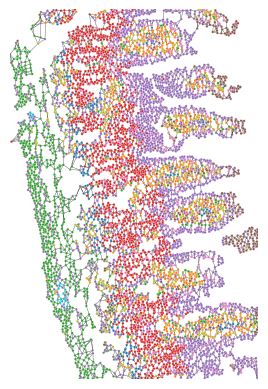

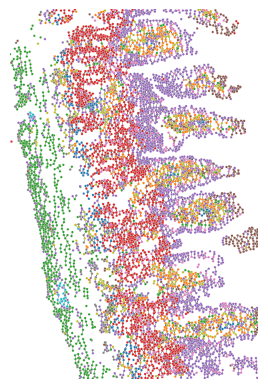

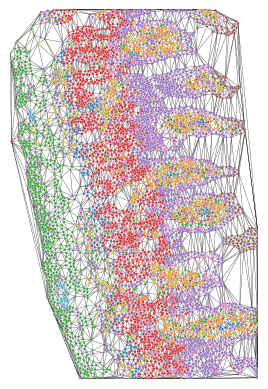

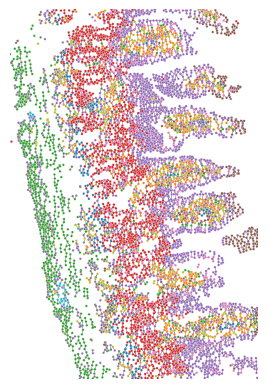

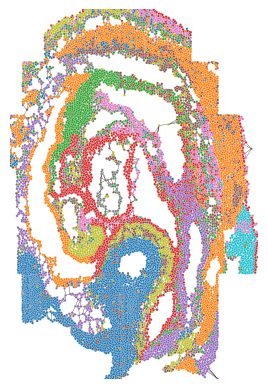

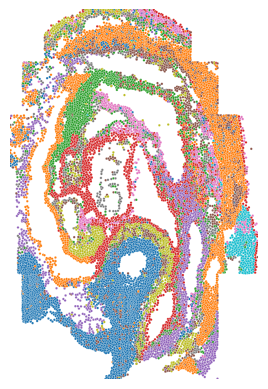

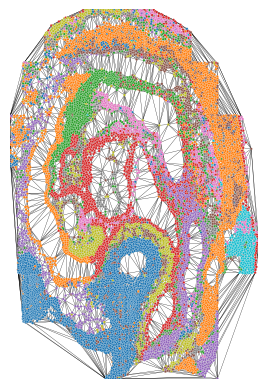

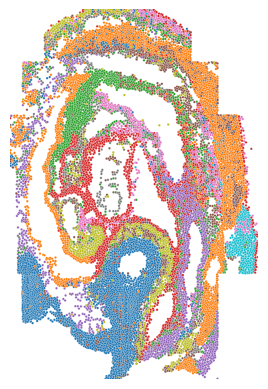

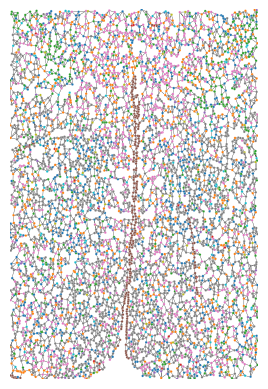

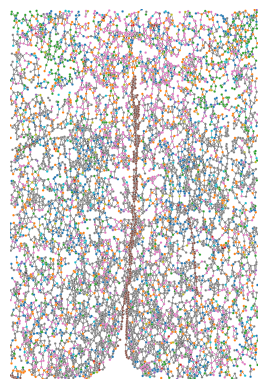

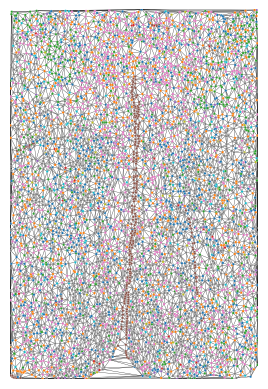

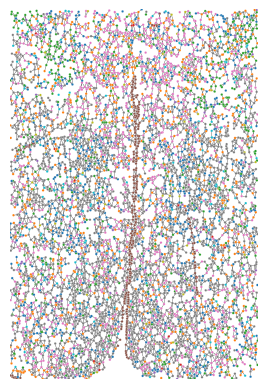

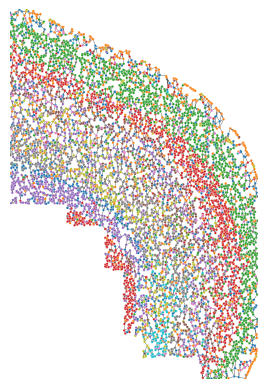

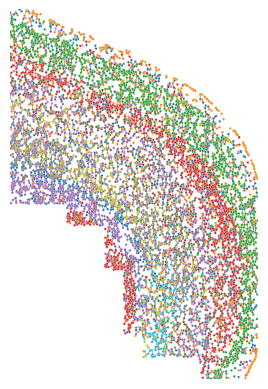

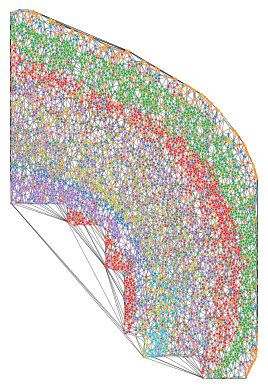

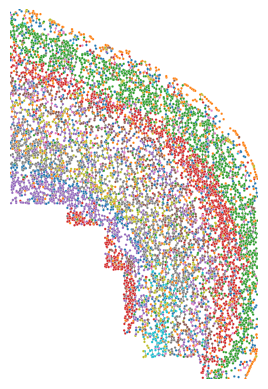

In [8]:
for dataset, cells, genes in iterate_datasets():
    cell_coordinates = cells[["x", "y"]].values
    features = genes.values
    true_labels = cells["cluster_id"].values
    constr_methods = ["knn", "radius", "delaunay", "radius_delaunay"]
    n_constr_methods = len(constr_methods)
    prop_cycle = plt.rcParams["axes.prop_cycle"]
    colors = prop_cycle.by_key()["color"]
    print(f"Starting with dataset {dataset}")
    for method in constr_methods:
        print(f"\tStarting with method {method}")
        fig, ax = plt.subplots(figsize=(plt.rcParams["figure.figsize"][0]*0.5, plt.rcParams["figure.figsize"][1]))
        pyg_G, _ = get_constructed_graph(
            constr_method=method,
            desired_avg_degree=7,
            positions=cell_coordinates,
            features=features,
            labels=true_labels,
            self_loops=True,
            verbose=False,
        )
        nx_G = to_networkx(pyg_G, to_undirected=True, node_attrs=["x", "pos", "y"], remove_self_loops=True)

        nx.draw_networkx_edges(
            nx_G,
            pos=nx.get_node_attributes(nx_G, "pos"),
            width=0.2,
            ax=ax
        )
        sns.scatterplot(
            ax=ax,
            data=cells,
            x="x",
            y="y",
            hue="cluster_id",
            s=3,
            palette=colors,
            legend=False,
        )
        plt.xlabel("")
        plt.ylabel("")
        ax.set(xticklabels=[], yticklabels=[])
        plt.ylim([0, 1])
        plt.xlim([0, 1])
        plt.xticks([], minor=True)
        plt.xticks([])
        plt.yticks([])
        # remove axis
        ax.axis("off")

## Table 2 - Performance of the Models on constructed Networks

Note that in the paper only one row per dataset is shown for the MLP model since the graph construction method does not influence the performance of the MLP model.

In [3]:
# Choose the best hyperparameter configuration for each dataset, model and construction method
# and get all runs for that configuration
table_res = get_best_results_per(raw_results, ["dataset", "model_name", "construction_method"])
# Compute mean and std of test f1 score for each dataset, model and construction method
mean_res = table_res.groupby(["dataset", "construction_method", "model_name"])["test_f1"].mean().rename("mean")
std_res = table_res.groupby(["dataset", "construction_method", "model_name"])["test_f1"].std().rename("std")
# Concatenate mean and std into a single table column
table_res = pd.concat([mean_res, std_res], axis=1)
string_res = table_res.apply(lambda x: f"{x['mean']:.2f} ± {x['std']:.2f}", axis=1)
# Sort the table
string_res = string_res.reindex(["intestine", "embryo", "hypothalamus", "brain"], level="dataset")
string_res = string_res.reindex(["knn", "radius", "delaunay", "radius_delaunay"], level="construction_method")
string_res = string_res.reindex(["MLP", "GCN", "SAGE", "GIN", "GAT"], level="model_name")

# Show table with models as columns and datasets and construction methods as rows
table_res = string_res.unstack().reset_index()
# Show table without index
table_res.style.hide()

## Table 3 - Performance of the Models with Random Features/Graph Topology

In [4]:
# Choose best hyperparameter configuration for each dataset, model and construction method
# and get all runs for that configuration for both tables
random_df = get_best_results_per(random_results, ["dataset", "construction_method", "model_name"])
shuffled_df = get_best_results_per(shuffled_results, ["dataset", "construction_method", "model_name"])
# Compute mean of test f1 score for each dataset, model and construction method for both tables
mean_res = random_df.groupby(["dataset", "construction_method", "model_name"])["test_f1"].mean().rename("mean")
mean_shuffled_res = shuffled_df.groupby(["dataset", "construction_method", "model_name"])["test_f1"].mean().rename("mean_shuffled")
# Concatenate mean of both tables into a single table column
table_res = pd.concat([mean_res, mean_shuffled_res], axis=1)
string_res = table_res.apply(lambda x: f"{x['mean']:.2f} ({x['mean_shuffled']:.2f})", axis=1)
# Sort the table
string_res = string_res.reindex(["intestine", "embryo", "hypothalamus", "brain"], level="dataset")
string_res = string_res.reindex(["knn", "radius", "delaunay", "radius_delaunay"], level="construction_method")
string_res = string_res.reindex(["MLP", "GCN", "SAGE", "GIN", "GAT"], level="model_name")
# Show table with models as columns and datasets and construction methods as rows
table_res = string_res.unstack().reset_index()
# Show table without index
table_res.style.hide()

## Table 6 - Standard Deviation corresponding to Table 3

In [5]:
std_res = random_df.groupby(["dataset", "construction_method", "model_name"])["test_f1"].std().rename("std")
std_shuffled_res = shuffled_df.groupby(["dataset", "construction_method", "model_name"])["test_f1"].std().rename("std_shuffled")
table_res = pd.concat([std_res, std_shuffled_res], axis=1)
string_res = table_res.apply(lambda x: f"{x['std']:.2f} ({x['std_shuffled']:.2f})", axis=1)
string_res = string_res.reindex(["intestine", "embryo", "hypothalamus", "brain"], level="dataset")
string_res = string_res.reindex(["knn", "radius", "delaunay", "radius_delaunay"], level="construction_method")
string_res = string_res.reindex(["MLP", "GCN", "SAGE", "GIN", "GAT"], level="model_name")
table_res = string_res.unstack().reset_index()
table_res.style.hide()

## Figure 3 - Datasets with Cell Types

/tmp/ipykernel_8511/1493856936.py:5: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_8511/1493856936.py:5: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_8511/1493856936.py:5: UserWarning: 
The palette list has fewer values (10) than needed (16) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(
/tmp/ipykernel_8511/1493856936.py:5: UserWarning: 
The palette list has fewer values (10) than needed (24) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


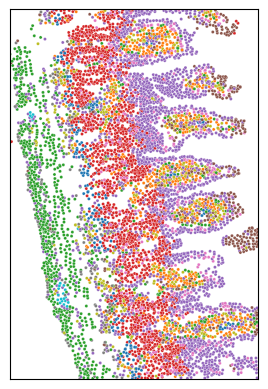

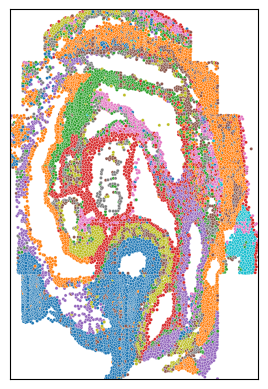

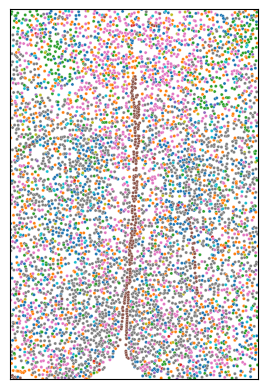

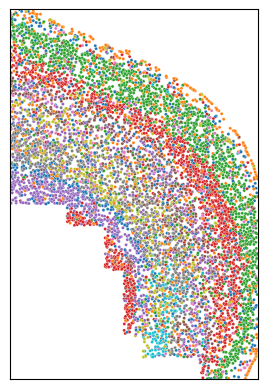

In [6]:
for name, cells, genes in iterate_datasets():
    fig, ax = plt.subplots(figsize=(plt.rcParams["figure.figsize"][0]*0.5, plt.rcParams["figure.figsize"][1]))
    prop_cycle = plt.rcParams["axes.prop_cycle"]
    colors = prop_cycle.by_key()["color"]
    sns.scatterplot(
        data=cells,
        x="x",
        y="y",
        hue="cluster_id",
        s=5,
        palette=colors,
        legend=False,
    )
    plt.xlabel("")
    plt.ylabel("")
    ax.set(xticklabels=[], yticklabels=[])
    plt.ylim([0, 1])
    plt.xlim([0, 1])
    plt.xticks([], minor=True)
    plt.xticks([])
    plt.yticks([])

## Figure 4 - Class Imbalance Visualization

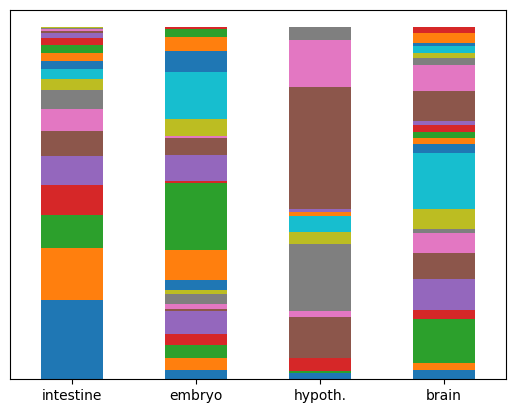

In [7]:
total_cell_counts = pd.DataFrame()
for name, cells, genes in iterate_datasets():
    cell_counts = cells["cluster_id"].value_counts(normalize=True)
    cell_count_df = pd.DataFrame(cell_counts).T
    cell_count_df["Dataset"] = name.replace("hypothalamus", "hypoth.")
    total_cell_counts = pd.concat([total_cell_counts, cell_count_df])
total_cell_counts.set_index("Dataset").plot(kind="bar", stacked=True, legend=False, rot=0)
plt.xlabel("")
plt.yticks([])
plt.xticks([], minor=True)
# disable grid
plt.grid(False)